# Social Media vs Productivity Analysis
## Importing Useful Libraries

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

## Data Loading

In [211]:
df=pd.read_csv('social_media_vs_productivity.csv')
df.head()


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [212]:
df=df.replace('?', np.nan)

In [213]:
df.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

In [214]:
df.describe(include="all")

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,30000,30000,27235.000000,30000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000,30000,30000.000000,30000.000000,30000.000000,27270.000000
unique,NaN,3,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,Male,Education,NaN,TikTok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
freq,NaN,14452,5055,NaN,6096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20979,22602,NaN,NaN,NaN,NaN
mean,41.486867,NaN,NaN,3.113418,NaN,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,NaN,NaN,1.999300,15.557067,10.360655,4.964901
std,13.835221,NaN,NaN,2.074813,NaN,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,NaN,NaN,1.410047,9.252956,7.280415,2.121194
min,18.000000,NaN,NaN,0.000000,NaN,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,1.639566,NaN,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,NaN,NaN,1.000000,8.000000,4.541872,3.363580
50%,41.000000,NaN,NaN,3.025913,NaN,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,NaN,NaN,2.000000,16.000000,10.013677,4.951049
75%,53.000000,NaN,NaN,4.368917,NaN,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,NaN,NaN,3.000000,24.000000,15.300809,6.581323


In [215]:
df.info

<bound method DataFrame.info of        age  gender    job_type  daily_social_media_time  \
0       56    Male  Unemployed                 4.180940   
1       46    Male      Health                 3.249603   
2       32    Male     Finance                      NaN   
3       60  Female  Unemployed                      NaN   
4       25    Male          IT                      NaN   
...    ...     ...         ...                      ...   
29995   34  Female      Health                 1.877297   
29996   39    Male      Health                 4.437784   
29997   42    Male   Education                17.724981   
29998   20  Female   Education                 3.796634   
29999   44    Male  Unemployed                      NaN   

      social_platform_preference  number_of_notifications  work_hours_per_day  \
0                       Facebook                       61            6.753558   
1                        Twitter                       59            9.169296   
2               

## Data Wrangling

In [216]:
df.replace('?', np.nan, inplace=True)

In [217]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [218]:
missing_data=df.isnull()
missing_data.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [219]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

age
age
False    30000
Name: count, dtype: int64
 
gender
gender
False    30000
Name: count, dtype: int64
 
job_type
job_type
False    30000
Name: count, dtype: int64
 
daily_social_media_time
daily_social_media_time
False    27235
True      2765
Name: count, dtype: int64
 
social_platform_preference
social_platform_preference
False    30000
Name: count, dtype: int64
 
number_of_notifications
number_of_notifications
False    30000
Name: count, dtype: int64
 
work_hours_per_day
work_hours_per_day
False    30000
Name: count, dtype: int64
 
perceived_productivity_score
perceived_productivity_score
False    28386
True      1614
Name: count, dtype: int64
 
actual_productivity_score
actual_productivity_score
False    27635
True      2365
Name: count, dtype: int64
 
stress_level
stress_level
False    28096
True      1904
Name: count, dtype: int64
 
sleep_hours
sleep_hours
False    27402
True      2598
Name: count, dtype: int64
 
screen_time_before_sleep
screen_time_before_sleep
False    27789

In [220]:
df.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

In [221]:
avg_daily_social_media_time=df["daily_social_media_time"].mean()
print(avg_daily_social_media_time)

3.113418084978472


In [222]:
df["daily_social_media_time"] = df["daily_social_media_time"].fillna(avg_daily_social_media_time)

In [223]:
df["daily_social_media_time"].isnull().value_counts()

daily_social_media_time
False    30000
Name: count, dtype: int64

In [224]:
avg_perceived_productivity_score=df["perceived_productivity_score"].mean()
print(avg_perceived_productivity_score)

5.510488184340142


In [225]:
df["perceived_productivity_score"]=df["perceived_productivity_score"].fillna(avg_perceived_productivity_score)

In [226]:
df["perceived_productivity_score"].isnull().value_counts()

perceived_productivity_score
False    30000
Name: count, dtype: int64

In [227]:
avg_stress_level=df["stress_level"].mean()
print(avg_stress_level)

5.514058940774487


In [228]:
df["stress_level"]=df["stress_level"].fillna(avg_stress_level)

In [229]:
df["stress_level"].isnull().value_counts()

stress_level
False    30000
Name: count, dtype: int64

In [230]:
avg_sleep_hours=df["sleep_hours"].mean()
print(avg_sleep_hours)

6.500247461760461


In [231]:
df["sleep_hours"]=df["sleep_hours"].fillna(avg_sleep_hours)

In [232]:
df["sleep_hours"].isnull().value_counts()

sleep_hours
False    30000
Name: count, dtype: int64

In [233]:
avg_screen_time_before_sleep=df["screen_time_before_sleep"].mean()
print(avg_screen_time_before_sleep)

1.0255681548961753


In [234]:
df["screen_time_before_sleep"]=df["screen_time_before_sleep"].fillna(avg_screen_time_before_sleep)

In [235]:
df["screen_time_before_sleep"].isnull().value_counts()

screen_time_before_sleep
False    30000
Name: count, dtype: int64

In [236]:
avg_job_satisfaction_score=df["job_satisfaction_score"].mean()
print(avg_job_satisfaction_score)

4.96490086213521


In [237]:
df["job_satisfaction_score"]=df["job_satisfaction_score"].fillna(avg_job_satisfaction_score)

In [238]:
df["job_satisfaction_score"].isnull().value_counts()

job_satisfaction_score
False    30000
Name: count, dtype: int64

In [239]:
df.dropna(subset=["actual_productivity_score"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [240]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,38,Male,Finance,1.512568,Twitter,50,6.429312,5.510488,4.081026,5.0,5.515251,1.518612,5,False,True,5,2,0.000000,4.568728


In [241]:
df.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

## Exploratory Data Analysis

<Axes: >

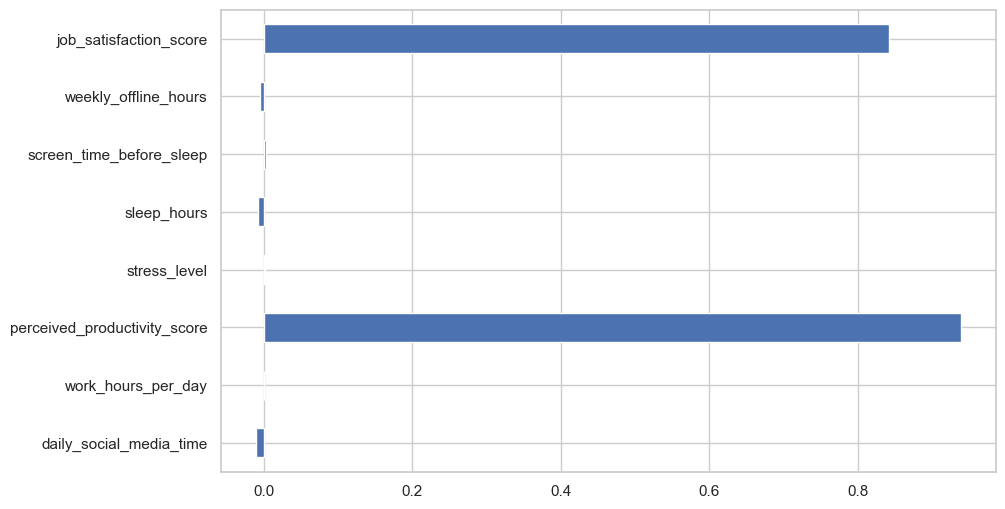

In [242]:
numeric_df=df.select_dtypes(include=["float"])
correlation_values=numeric_df.corr()["actual_productivity_score"].drop("actual_productivity_score")
correlation_values.plot(kind='barh', figsize=(10, 6)) 

<Axes: title={'center': 'Correlation Matrix'}>

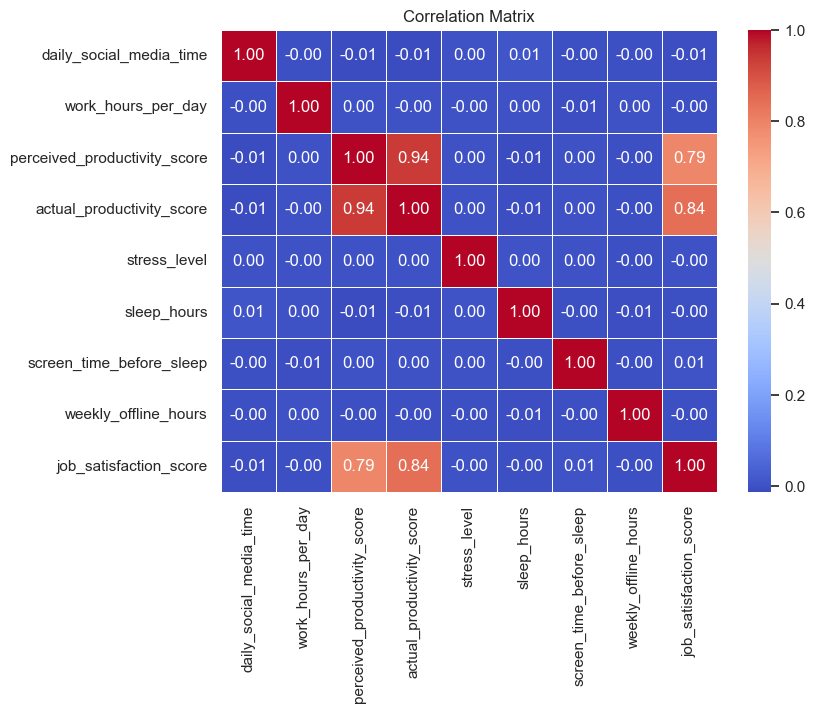

In [243]:

correlation_matrix=numeric_df.corr()

plt.figure(figsize=(8, 6))
plt.title("Correlation Matrix") 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)


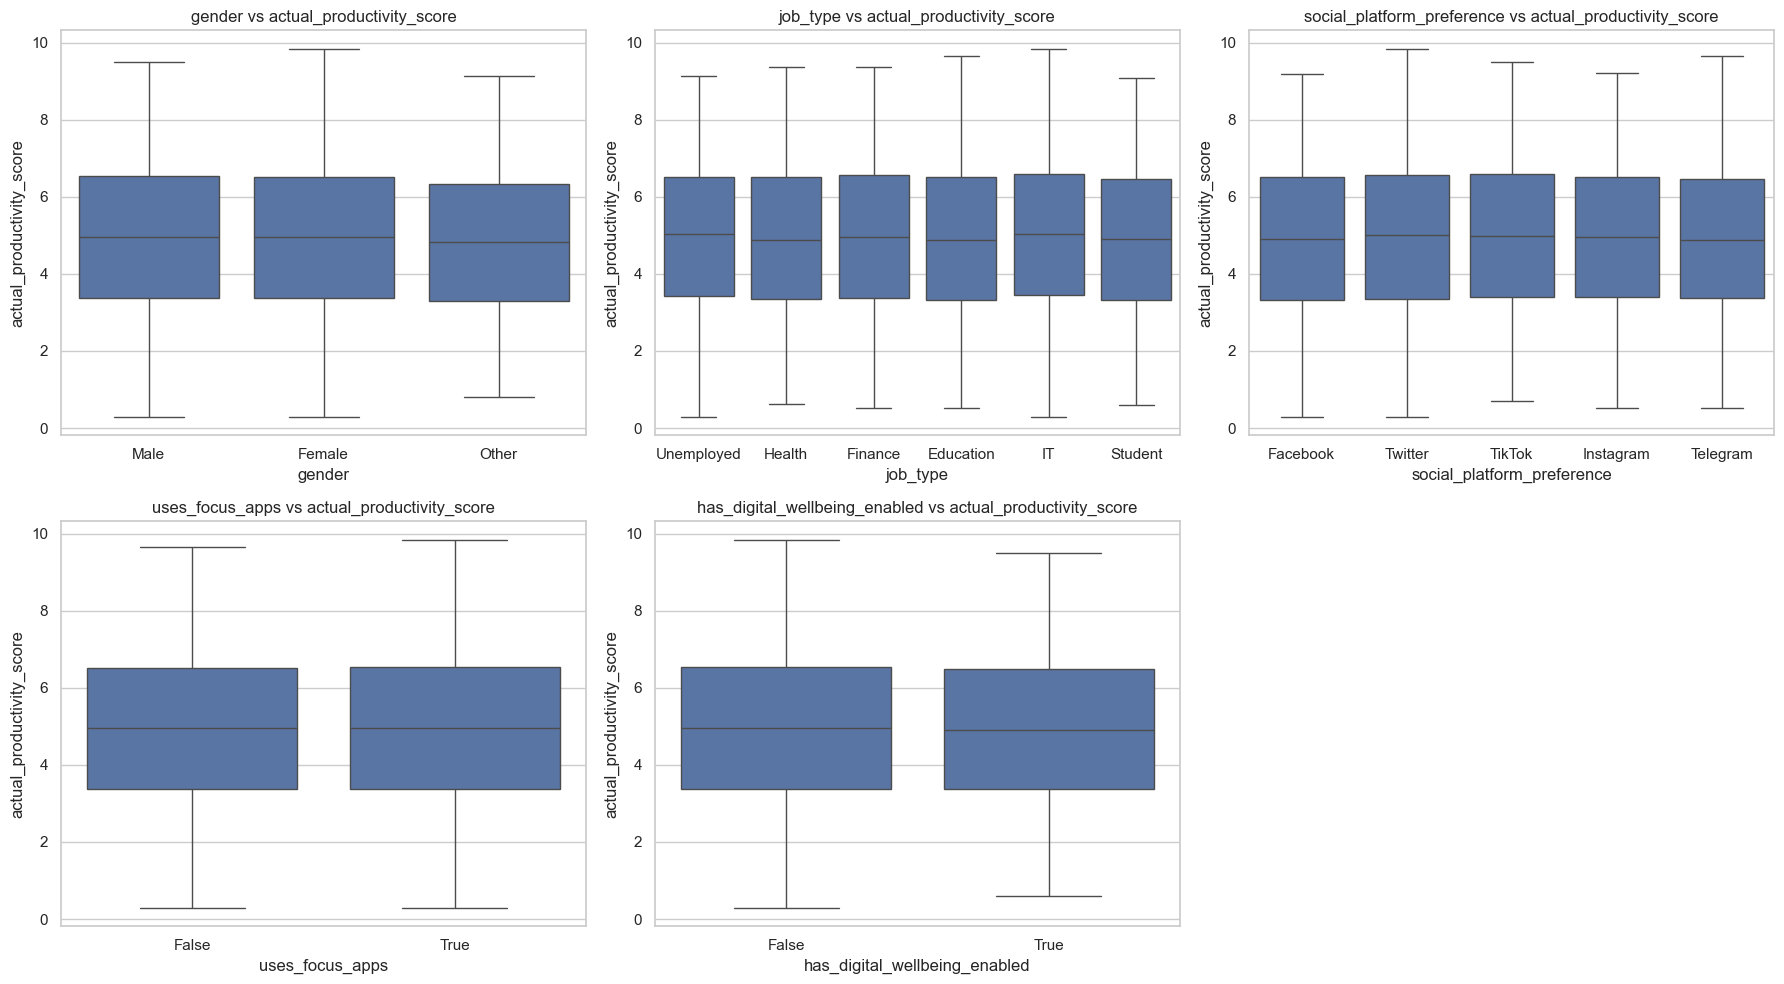

In [244]:
sns.set(style="whitegrid")

categorical_features=[
    "gender",
    "job_type",
    "social_platform_preference",
    "uses_focus_apps",
    "has_digital_wellbeing_enabled"
]

target="actual_productivity_score"

fig, axes=plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes=axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y=target, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}', fontsize=12)
    axes[i].tick_params(axis='x')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [245]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["gender"]=label_encoder.fit_transform(df["gender"])
df["job_type"]=label_encoder.fit_transform(df["job_type"])
df["social_platform_preference"]=label_encoder.fit_transform(df["social_platform_preference"])
df["uses_focus_apps"]=label_encoder.fit_transform(df["uses_focus_apps"])
df["has_digital_wellbeing_enabled"]=label_encoder.fit_transform(df["has_digital_wellbeing_enabled"])

## Model Development

In [246]:
X=df.drop("actual_productivity_score", axis=1)
y=df["actual_productivity_score"]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
xgb=XGBRegressor(n_estimators=100, random_state=42)

In [248]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,1,5,4.180940,0,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,0,0,4,11,21.927072,6.336688
1,46,1,2,3.249603,4,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,1,1,2,25,0.000000,3.412427
2,32,1,1,3.113418,4,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,1,0,3,17,10.322044,2.474944
3,60,0,5,3.113418,0,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,0,0,0,4,23.876616,1.733670
4,38,1,1,1.512568,4,50,6.429312,5.510488,4.081026,5.0,5.515251,1.518612,5,0,1,5,2,0.000000,4.568728


In [249]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("Model trained and predictions made.")

Model trained and predictions made.


In [250]:
rf.fit(X_train, y_train)

y_pred_rf=rf.predict(X_test)
print("Model trained and predictions made.")

Model trained and predictions made.


## Model Evaluation

In [251]:
mse_rf=mean_squared_error(y_pred_rf, y_test)
mse_xgb=mean_squared_error(y_pred_xgb, y_test)

r2_rf=r2_score(y_pred_rf, y_test)
r2_xgb=r2_score(y_pred_xgb, y_test)

In [252]:
print(f"Random Forest MSE= {mse_rf: .2f}, R2 Score= {r2_rf: .2f}")
print(f"XGB MSE= {mse_xgb: .2f}, R2 Score= {r2_xgb: .2f}")

Random Forest MSE=  0.27, R2 Score=  0.92
XGB MSE=  0.28, R2 Score=  0.91


In [253]:
std_y=np.std(y_test)

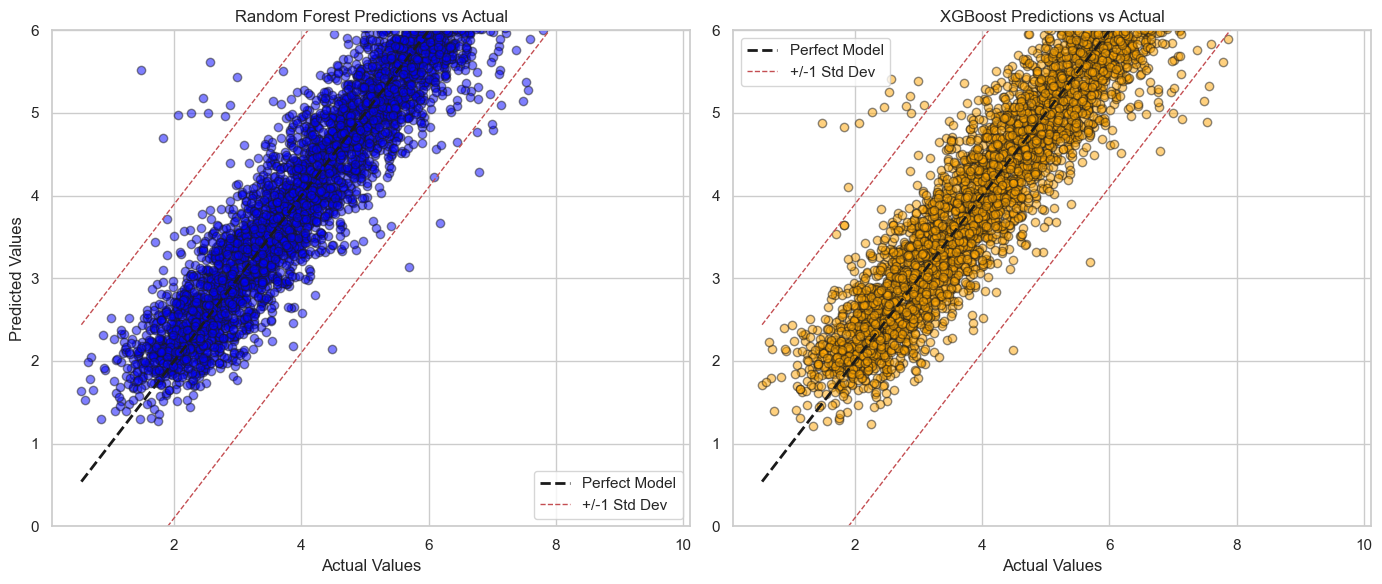

In [257]:
plt.figure(figsize=(14, 6))

#Random Forest Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, label='Perfect Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min()+std_y, y_test.max()+std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min()-std_y, y_test.max()-std_y], 'r--', lw=1, )
plt.ylim(0, 6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

#XGBoost Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='orange', ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min()+std_y, y_test.max()+std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min()-std_y, y_test.max()-std_y], 'r--', lw=1, )
plt.ylim(0, 6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

Both the models predicted really well within a standard deviation of the target.